# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 



1) Откроем файл с данными и изучим общую информацию. 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


2) Предобработка данных

In [9]:
#Остаются еще пропуски в locality_name (49 пропусков). Т.к. мы имеем дело с данными Яндекс.Недвижимость по Санкт-Петербургу и ЛО, то я предполагаю, что пропущенные названия населенного пункта это Санкт-Петербург. Большинство объявлений именно по СПб, люди решили дополнительно не указывать 
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')

In [10]:
#Заменим в ponds_around3000 пустое значение на ноль(0),т.к. очевидно, что раз никакой инормации не указано, то и прудов радиусе 3 км нет. аналогичный подход применим и к parks_around3000
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
#Переведем данные в целые числа
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [11]:
#Огромное количество пропусков в столбцах parks_nearest и ponds_nearest, гораздо больше чем было в parks_around3000 и ponds_around3000. Это скорее всего значит, что прямо в шаговой доступности ни парков ни водоемов в пропусках просто нет, но в радиусе 3км присутствуют
#Поверить, что в ЛО и Санкт-Петербурге нет рядом водоемов, сложно. С парками аналогично. Видимо не все посчитали нужным указывать.  
median_park = data['parks_nearest'].median()
median_pond = data['ponds_nearest'].median()
data['parks_nearest'] = data['parks_nearest'].fillna(median_park)
data['ponds_nearest'] = data['ponds_nearest'].fillna(median_pond)

#Переведем данные в целые числа
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')

In [12]:
#data['locality_name'].unique()
#Теперь пропуски в столбцах airports_nearest и cityCenters_nearest сначала я посмотрел на список уникальных локаций, где продают квартиры. Мы видим, что из крупных городов только Санкт-Петербург, и очень много деревень и поселков Ленинградской области, которые находятся далеко от городского центра (Санкт-Петербурга) и от местного же аэропорта. Поэтому и появились пропуски в airports_nearest и cityCenters_nearest. 
#Проблема в том, что нам эти данные будут нужны, а все поселения ЛО так или иначе имеют доступ к аэропорту и городскому центру 
#Поэтому заменим на медианое расстояние
city_median = data['cityCenters_nearest'].median()
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(city_median)
airport_median = data['airports_nearest'].median()
data['airports_nearest'] = data['airports_nearest'].fillna(airport_median)
#переведем метры в километры
data['airports_nearest'] = data['airports_nearest'] / 1000
data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18.863,16.0280,1,482,2,755,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12.817,18.6030,0,455,0,502,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21.741,13.9330,1,90,2,574,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28.098,6.8000,2,84,3,234,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31.856,8.0980,2,112,1,48,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,26.726,13.0985,0,455,0,502,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52.996,19.1430,0,455,0,502,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23.982,11.6340,0,455,0,502,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,26.726,13.0985,0,455,0,502,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50.898,15.0080,0,455,0,502,289.0


In [13]:
#Пропуски по наличию балкона означают, что балкона нет, поэтому заменим NaN на 0
data['balcony'] = data['balcony'].fillna(0)

#Переведем значения в целые числа
data['balcony'] = data['balcony'].astype('int')


In [18]:
#У нас еще имеется 86 пропусков в столбце floors_total. 
#Запоним это значение медианным количесвтом этажей в кажждом из представленных населенных пунктов
def local_floors(local_f):
    median_values = data[data['locality_name'] == local_f]['floors_total'].median()
    data.loc[(data['locality_name'] == local_f) & (data['floors_total'].isna()), 'floors_total'] = median_values
for local_f in data['locality_name'].unique():
    print(local_f)
    local_floors(local_f)
    
data['floors_total'] = data['floors_total'].astype('int')
    


Санкт-Петербург
посёлок Шушары
городской посёлок Янино-1
посёлок Парголово
посёлок Мурино
Ломоносов
Сертолово
Петергоф
Пушкин
деревня Кудрово
Коммунар
Колпино
поселок городского типа Красный Бор
Гатчина
поселок Мурино
деревня Фёдоровское
Выборг
Кронштадт
Кировск
деревня Новое Девяткино
посёлок Металлострой
посёлок городского типа Лебяжье
посёлок городского типа Сиверский
поселок Молодцово
поселок городского типа Кузьмоловский
садовое товарищество Новая Ропша
Павловск
деревня Пикколово
Всеволожск
Волхов
Кингисепп
Приозерск
Сестрорецк
деревня Куттузи
посёлок Аннино
поселок городского типа Ефимовский
посёлок Плодовое
деревня Заклинье
поселок Торковичи
поселок Первомайское
Красное Село
посёлок Понтонный
Сясьстрой
деревня Старая
деревня Лесколово
посёлок Новый Свет
Сланцы
село Путилово
Ивангород
Мурино
Шлиссельбург
Никольское
Зеленогорск
Сосновый Бор
поселок Новый Свет
деревня Оржицы
деревня Кальтино
Кудрово
поселок Романовка
посёлок Бугры
поселок Бугры
поселок городского типа Рощино
Кириши

In [19]:
#Заполним пропущенные значения в столбце ceiling_height медианным значением высоты потолков в засисимости от количества этажей в доме
def fill_ceiling(floors_number):
    median_value = data[data['floors_total'] == floors_number]['ceiling_height'].median()
    data.loc[(data['floors_total'] == floors_number) & (data['ceiling_height'].isna()), 'ceiling_height'] = median_value
for floors_number in data['floors_total'].unique(): 
    print(floors_number)
    fill_ceiling(floors_number)
data.isna().sum()  
    

16
11
5
14
12
26
24
27
9
6
17
25
3
23
19
18
4
22
8
2
10
7
13
15
20
28
36
21
35
34
60
1
29
33
52
37


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition          3181
dtype: int64

In [29]:
#Есть интереесная закономерность: метраж квартир заполнен везде, но при этом имеются пропуски в столбцах living_area и kitchen_area. Получается, что в некоторых случаях люди не утруждали себя внесением конкретных данных или речь идет о новостройках
#Самих пропусков не очень много, а данные для решения задачи нужны, поэтому попробуем заполнить пропуски исходя из доли каждого помещения в квартире
def living_median(room):
    median_area = data['total_area'].median() / data['living_area'].median()
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = median_area
for room in data['rooms'].unique():
    living_median(room)
    

In [30]:
#Сделаем то же самое для kitchen_area
def kitchen_median(room):
    median_eat = data['total_area'].median() / data['kitchen_area'].median()
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'kitchen_area'] = median_eat
for room in data['rooms'].unique():
    kitchen_median(room)
    

In [32]:
#data['studio'].value_counts(): False    23550; True       149
#data['is_apartment'].value_counts(): False    2725; True       50
#apartments = data[['is_apartment', 'studio']]
#apartments.head(50)
#Мы видим, что все значения для 'studio' заполнены и большиснтво там False, у is_apartment (квартир) очень много пропусков. 
#Предположим, что люди, помчая недвижимость как не студию, по умолчанию подразумевали квартиру. 
#Если же и is_apartment и studio False, значит продавали дом или иной жилой объект, т.е. пропуски is_apartment не умышленные, а люди по умолчанию имеют ввиду квартиру
#Заполним тогда пропуски is_apertment True
data['is_apartment'] = data['is_apartment'].fillna(True)

In [31]:
#Обратим внимание на пропуски в столбце days_exposition. Их опять таки мало, но нам эти данные в будущем понадобятся. Скорее всего, пропуски означают, что квартира еще продается, поэтому выбросим их
data.dropna(subset = ['days_exposition'], inplace = True)
#Сделаем числы целыми
data['days_exposition'] = data['days_exposition'].astype('int')

data['last_price'] = data['last_price'].astype('int')

data['price_million'] = data['last_price'] / 1000000

data.head(30)




,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_million
1,7,3350000,40,2018-12-04,1,2.75,11,18.600000,1,True,...,2,посёлок Шушары,12.817,18.6030,0,455,0,502,81,3.350
2,10,5196000,56,2015-08-20,2,2.55,5,34.300000,4,True,...,0,Санкт-Петербург,21.741,13.9330,1,90,2,574,558,5.196
3,0,64900000,159,2015-07-24,3,2.60,14,1.724138,9,True,...,0,Санкт-Петербург,28.098,6.8000,2,84,3,234,424,64.900
4,2,10000000,100,2018-06-19,2,3.03,14,32.000000,13,True,...,0,Санкт-Петербург,31.856,8.0980,2,112,1,48,121,10.000
5,10,2890000,30,2018-09-10,1,2.65,12,14.400000,5,True,...,0,городской посёлок Янино-1,26.726,13.0985,0,455,0,502,55,2.890
6,6,3700000,37,2017-11-02,1,2.66,26,10.600000,6,True,...,1,посёлок Парголово,52.996,19.1430,0,455,0,502,155,3.700
8,20,2900000,33,2018-05-23,1,2.70,27,15.430000,26,True,...,0,посёлок Мурино,26.726,13.0985,0,455,0,502,189,2.900
9,18,5400000,61,2017-02-26,3,2.50,9,43.600000,7,True,...,2,Санкт-Петербург,50.898,15.0080,0,455,0,502,289,5.400
10,5,5050000,39,2017-11-16,1,2.67,12,20.300000,3,True,...,0,Санкт-Петербург,38.357,13.8780,1,310,2,553,137,5.050
11,9,3300000,44,2018-08-27,2,2.55,5,31.000000,4,False,...,1,Ломоносов,48.252,51.6770,0,455,0,502,7,3.300


In [33]:
#Переведем содержимое first_day_exposition в понятные даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [34]:
data['total_area'] = data['total_area'].astype('int')

3) Добавим в таблицу столбцы с новыми параметрами

In [35]:
#Добавим в таблицу столбец с ценами за один квадратный метр (m_price) и сразу же сделаем занчения ового столбца целыми
data['m_price'] = data['last_price'] / data['total_area']

In [37]:
#Добавим в таблицу столбцы с данными о годе, месяце и дне недели
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['weekday'] = data['first_day_exposition'].dt.weekday


In [38]:
#data['floor'].max() - самый высокий этаж 33
#data['floor'].min() - 1 этаж
#data['floor'].value_counts() - больше всего предложений по продаже квартир в первых 5 этажах домов. Обозначим 1 этаж как 'первый'.
#Ввивду различной типовой застройки, 'последний этаж' будет приравнен к значению столбца 'total_floors'

def floor_number(row):
    if row['floor'] == 1:
        return 'первый этаж'
    if row['floors_total'] == row['floor']:
        return 'последний этаж'
    return 'другой'
data['floor_index'] = data.apply(floor_number, axis = 1)



In [39]:
#Добавим столбцы с долями жилой площажи и кухни
data['living_part'] = data['living_area'] / data['total_area'] * 100
data['kitchen_part'] = data['kitchen_area'] / data['total_area'] * 100
data['living_part'] = data['living_part'].astype('int')
data['kitchen_part'] = data['kitchen_part'].astype('int')

4) Анализ данных

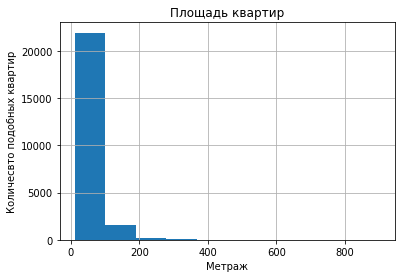

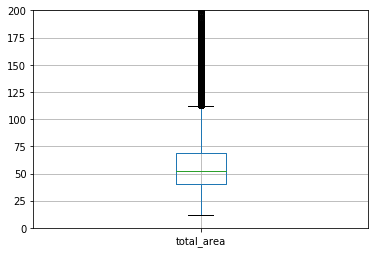

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

In [18]:
data['total_area'].hist()
plt.title('Площадь квартир')
plt.xlabel('Метраж')
plt.ylabel('Количесвто подобных квартир')
plt.show()
data.boxplot('total_area')
plt.ylim(0, 200)
plt.show()
data['total_area'].describe()
#Небольшая аномалия - есть квартиры площадью более 200 квадратных метров, почти до 400 доходит. Анамалией график считает и значения более 110 м2

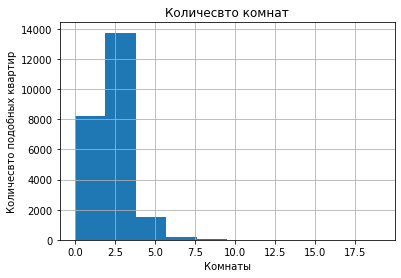

In [19]:
data['rooms'].hist()
plt.title('Количесвто комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количесвто подобных квартир')
plt.show()
#Достаточно квартир, где больше 5 комнат, это необычно

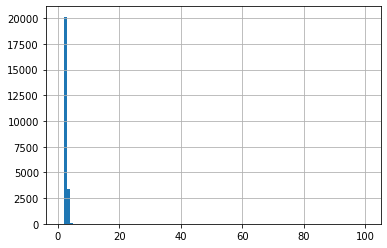

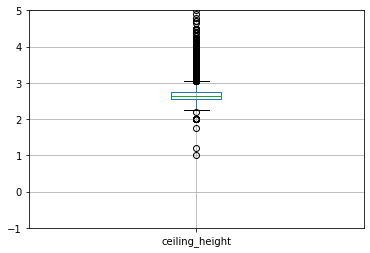

count    23698.000000
mean         2.736141
std          0.994290
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [20]:
data['ceiling_height'].hist(bins = 100)
plt.show()
data.boxplot('ceiling_height')
plt.ylim(-1, 5)
plt.show()
data['ceiling_height'].describe()
#В оснвном высота потолков в районе 2.5 - 3 метров, но есть и аномалии вроде потолка в 100 метров

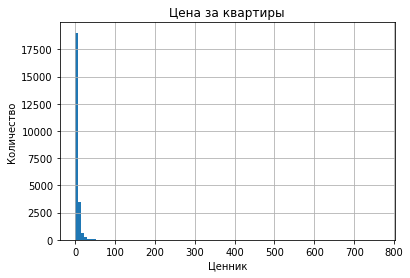

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: price_million, dtype: float64

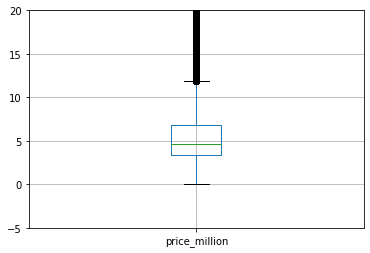

In [21]:

data['price_million'].hist(bins = 100)
plt.title('Цена за квартиры')
plt.xlabel('Ценник')
plt.ylabel('Количество')
plt.show()
data.boxplot('price_million')
plt.ylim(-5, 20)
data['price_million'].describe()
#plt.ylim(0, 30)
#data.boxplot(column = 'last_price')
#plt.show()
#data['last_price'].describe()


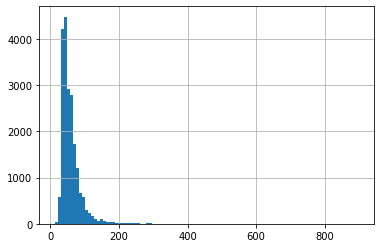

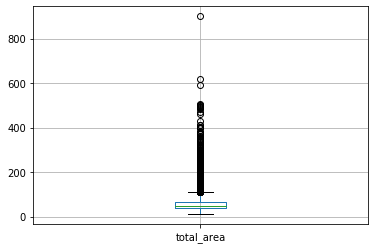

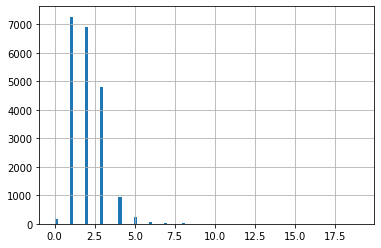

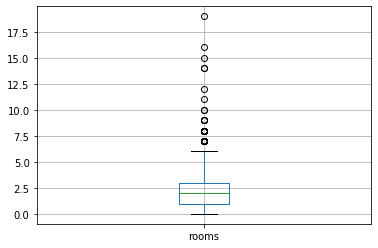

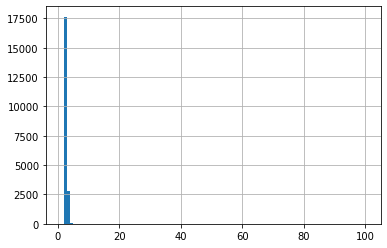

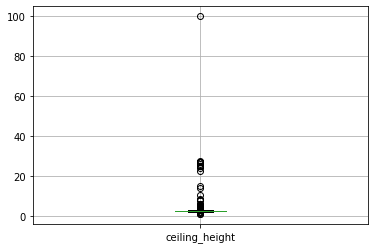

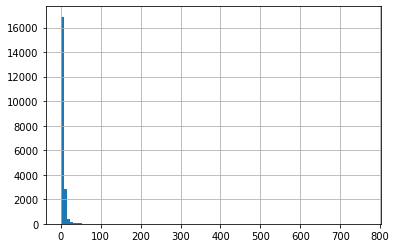

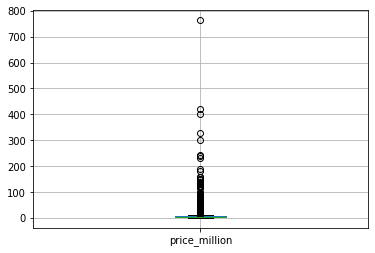

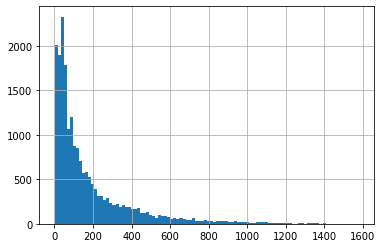

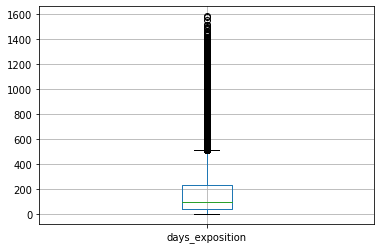

In [96]:
hist_tables = data[['total_area', 'rooms', 'ceiling_height', 'price_million', 'days_exposition']]
for row in hist_tables:
    hist_tables[row].hist(bins = 100)
    plt.show()
    hist_tables.boxplot(row)
    plt.show()
    

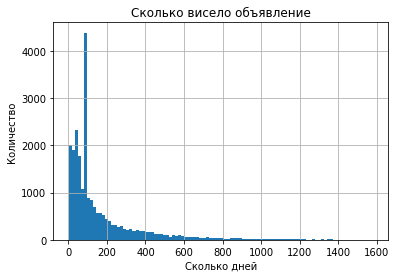

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

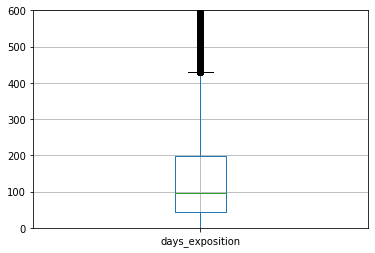

In [22]:
data['days_exposition'].hist(bins = 100)
plt.title('Сколько висело объявление')
plt.xlabel('Сколько дней')
plt.ylabel('Количество')
plt.show()
data.boxplot('days_exposition')
plt.ylim(0, 600)
data['days_exposition'].describe()
#data['days_exposition'].mean() - 169.36022616988058 дней
#data['days_exposition'].median() - 95.0 дней
#Исходя их гистограммы, среднего и медианного в соновном объявления 'висят'до 200 дней. Однако есть и отдельные объявления которые существуют до 3-х лет, это очень много.
#Аномалия - более 420 дней


In [41]:
#Почистим таблицу от аномальных данных и создадим новую таблицу good_data
good_data = data.query('total_area <= 110 & 1 <= rooms < 5 & 2.3 <= ceiling_height <= 3.1 & price_million <= 12 & days_exposition <= 420')

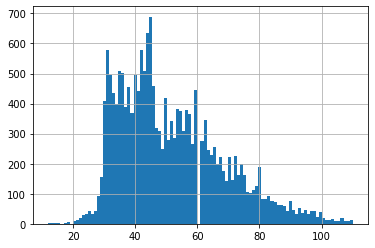

In [28]:
#Построим графики по уже 'очищенным показателям'
good_data['total_area'].hist(bins = 100)
#Самая популярная площадь квартиры - примерно 45 м2б квартир с метражом более 60 м2 довольно мало

0.6806599447279973

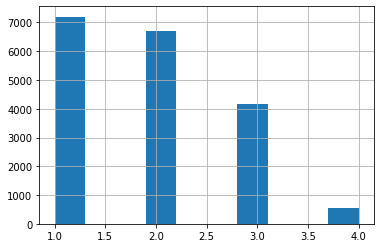

In [64]:
good_data['rooms'].hist()
#4 комнаты это редкость, в то время как 'однушки' и 'двушки' популярны
#good_data['rooms'].corr(good_data['total_area']) - 0.7944693572129612
#Как мы видим, количество комнат коррелирует с метражом квартир


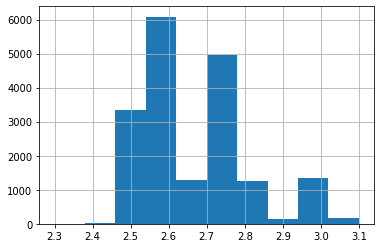

In [30]:
good_data['ceiling_height'].hist()
#Потолки выше 3 метров - редкость

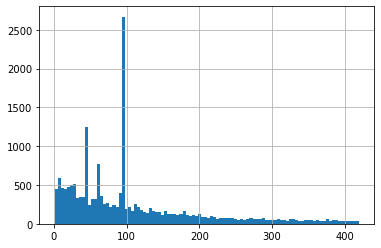

In [32]:
good_data['days_exposition'].hist(bins = 100)
#Квартиры в основном быстро продаются, в течении года.

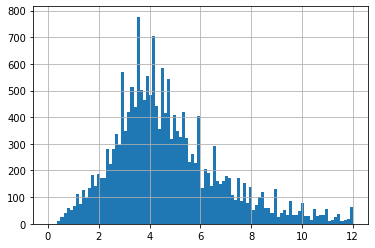

In [52]:
good_data['price_million'].hist(bins = 100)
#Самый популярный сегмент - квартиры за 2.5 - 4.5 млн

In [51]:
good_data['price_million'].corr(good_data['m_price']) #  0.6470796277702163
#Общая цена квартиры действительно в большей степени зависит от цены на квадратный метр

#price_relate = good_data.pivot_table(index = 'price_million', values = ['rooms','total_area', 'cityCenters_nearest', 'floor','year', 'month', 'weekday'])
#price_relate.corr()


,cityCenters_nearest,floor,month,rooms,total_area,weekday,year
cityCenters_nearest,1.000000,-0.001007,-0.001138,-0.155930,-0.212800,-0.053162,0.028924
floor,-0.001007,1.000000,-0.091038,0.022968,0.117784,0.021838,0.007532
month,-0.001138,-0.091038,1.000000,0.021507,-0.007258,0.055889,-0.252373
rooms,-0.155930,0.022968,0.021507,1.000000,0.828529,-0.035576,-0.077179
total_area,-0.212800,0.117784,-0.007258,0.828529,1.000000,-0.023247,-0.100143
weekday,-0.053162,0.021838,0.055889,-0.035576,-0.023247,1.000000,-0.041383
year,0.028924,0.007532,-0.252373,-0.077179,-0.100143,-0.041383,1.000000


In [65]:
good_data['price_million'].corr(good_data['rooms']) #  0.40803097082857237
good_data['price_million'].corr(good_data['total_area']) # 0.6806599447279973
#Также есть взаимосвязь между количесвтом комнат и ценой. Но общая площадь влияет на цену в большей степени

0.6806599447279973

In [102]:
good_data['price_million'].corr(good_data['cityCenters_nearest']) #  -0.1863786882376183
#Прямой взаиомсвязи (корреляции) между ценой и степени удаленности от центра нет

AttributeError: 'numpy.float64' object has no attribute 'plot'

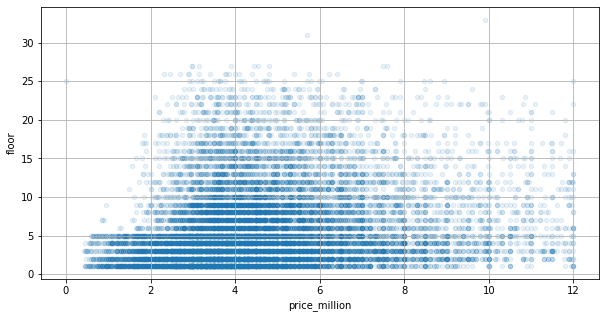

In [98]:
good_data['price_million'].corr(good_data['floor']) #  0.1781468632825332
#Прямая взимосвязь цены и этажа, на котором расположен квартира, есть. Но этот показатель влияет на цену в меньшей степени нежели, например, количество комнат


In [41]:
good_data['price_million'].corr(good_data['year']) # 0.0345840862878397 Взаимосвязь есть, но она слабая
good_data['price_million'].corr(good_data['month']) # 0.0026706912401585027 С меясцем размещения связь еще меньше
good_data['price_million'].corr(good_data['weekday']) # -0.009995912611514333 Связи с днем недели размещения объявления и ценой нет

#Тот факт, что год рамзещения влияет на цену в большей степени, чем месяц размещения объявления о продаже, вполне логичен. Рынок недвижимости меняется год от году, экономика в последние несколько лет тоже переживала не лучшие времена


-0.009995912611514333

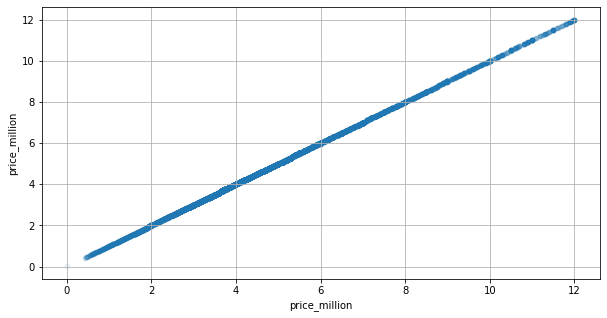

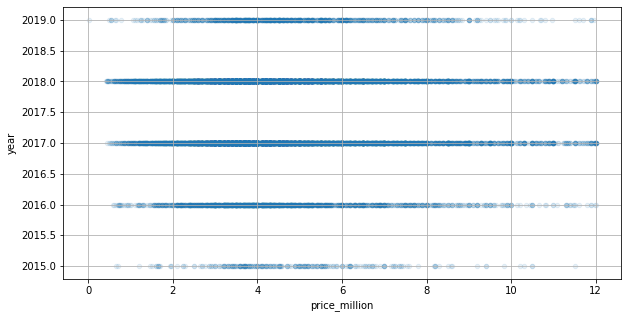

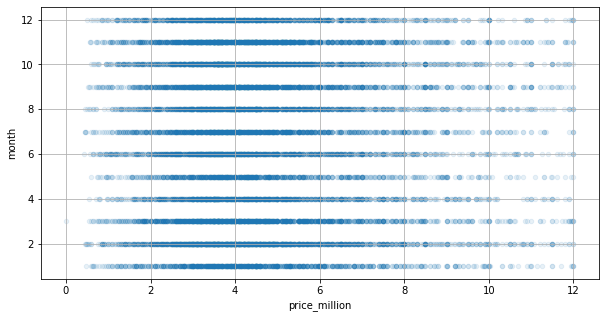

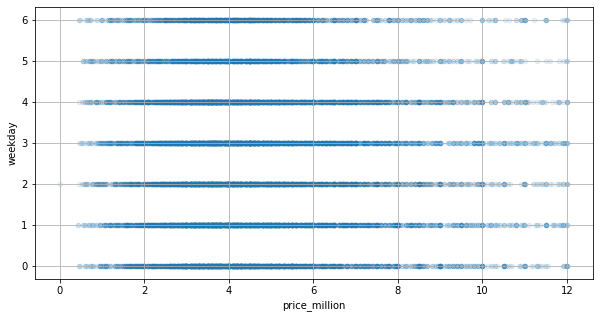

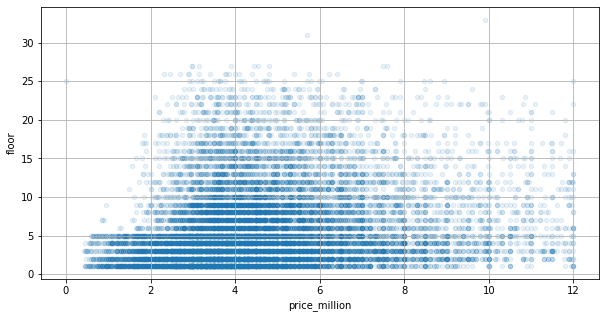

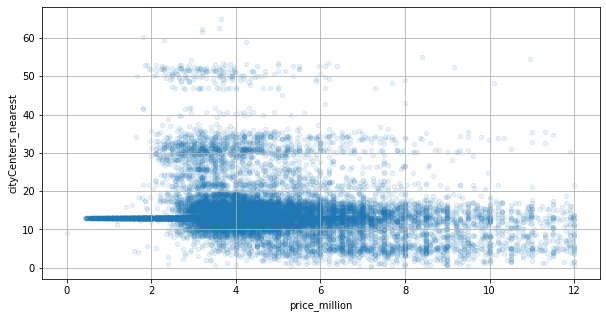

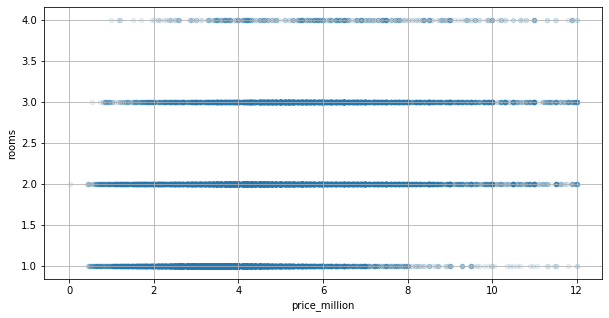

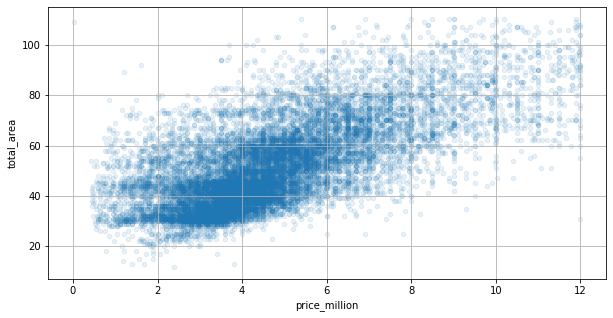

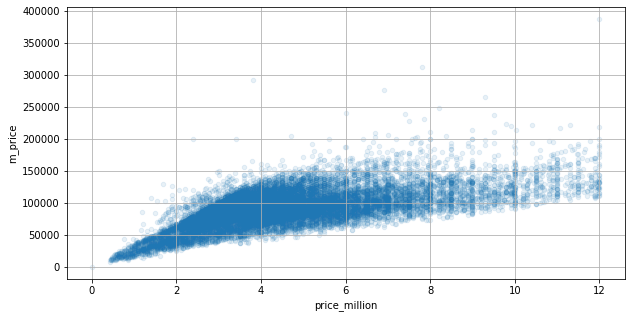

In [111]:
#Графики корреляции
good_data_tables = good_data[['price_million','year', 'month', 'weekday', 'floor', 'cityCenters_nearest', 'rooms', 'total_area', 'm_price']]
for row in good_data_tables:
    good_data_tables.plot(kind = 'scatter', x = 'price_million', y = row, grid = True, alpha = 0.1, figsize = (10, 5))
plt.show()

In [108]:
local_count = good_data.pivot_table(index = 'locality_name', values = 'price_million', aggfunc = 'count').sort_values(by = 'price_million', ascending = False)
#print(local_count.head(10))
top_ten = local_count.query('price_million >= 193')
data_gg = good_data.query('locality_name in @top_ten.index')
#data_gg['m_price'].mean() - средняя стоимость метра в квадрате 101400.35172548897
#data_gg['m_price'].max() - 387096.77419354836
#data_gg['m_price'].min() - 111.8348623853211(112)
#Возьмем за высокую цену  рубеж 110000 за квадратный метр, это как раз выше среднего значения. Границу низкой цены установим на 90000 за квадртаный метр
def price_rate(m_price):
    if m_price >= 110000:
        return 'высокая стоимость'
    if m_price <= 90000:
        return 'низкая стоимость'
    return 'средняя цена'
data_gg['price_rate'] = data_gg['m_price'].apply(price_rate)
#data_gg.head(30)
local_rate = data_gg.pivot_table(index = 'locality_name', columns = 'price_rate', values = 'm_price', aggfunc = 'count')
local_rate.head(30)
#Можно сделать вывод, что в Выборге самое дешевое жилье, самое дорогое в СПб, но стоит обратить внимание и на Пушкин


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


price_rate,высокая стоимость,низкая стоимость,средняя цена
locality_name,,,
Всеволожск,2.0,276.0,9.0
Гатчина,NaN,219.0,12.0
Колпино,2.0,247.0,28.0
Пушкин,54.0,69.0,126.0
Санкт-Петербург,3578.0,2697.0,4027.0
деревня Кудрово,18.0,108.0,121.0
посёлок Мурино,20.0,273.0,154.0
посёлок Парголово,29.0,125.0,117.0
посёлок Шушары,6.0,298.0,59.0


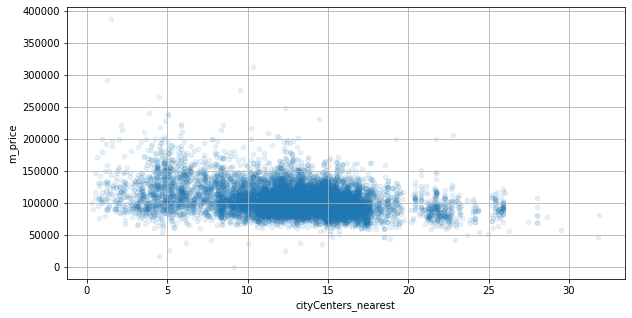

In [109]:
good_data.query('locality_name == "Санкт-Петербург"').plot(kind = 'scatter',
                                                           x = 'cityCenters_nearest',
                                                           y = 'm_price',
                                                           grid = True,
                                                           alpha = 0.1,
                                                           figsize = (10, 5))
                                                          
                                                         
plt.show()
#По графику мы видим, что чем ближе, тем дороже недвижимость. На этом основании можно отпределить центральную зону. 
#Цена начинает снжаться в районе 10 км. На этой отметке и сделаем срез

In [110]:
center_data = good_data.query('cityCenters_nearest <= 10')

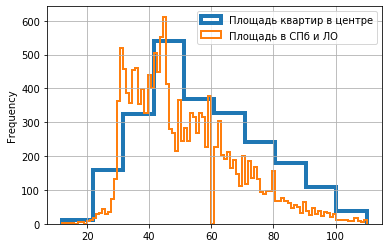

In [90]:
center_data['total_area'].plot(kind = 'hist', bins = 10, histtype = 'step',linewidth = 4, label = 'Площадь квартир в центре', grid = True, legend = True)
#plt.title('Площадь квартир в центре')
#plt.show()
good_data['total_area'].plot(kind = 'hist', bins = 100, histtype = 'step', linewidth = 2,label = 'Площадь в СПб и ЛО', grid = True, legend = True)
#plt.title('Площадь в СПб и ЛО')
#plt.show()

#Мы видим, что ближе к центру больше квртир с площадью более 45 м2


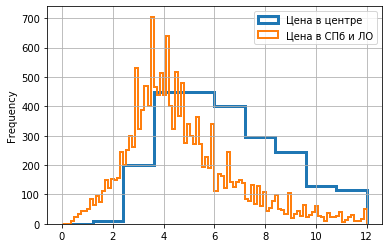

In [89]:
center_data['price_million'].plot(kind = 'hist', bins = 10, histtype = 'step', linewidth = 3,label = 'Цена в центре', grid = True, legend = True)
#plt.title('Цена в центре')
#plt.show()
good_data['price_million'].plot(kind = 'hist', bins = 100, histtype = 'step', linewidth = 2,label = 'Цена в СПб и ЛО', grid = True, legend = True)
#plt.title('Цена в СПб и ЛО')
#plt.show()
#Цена в центра, конечно, разительно отличается в большую сторону

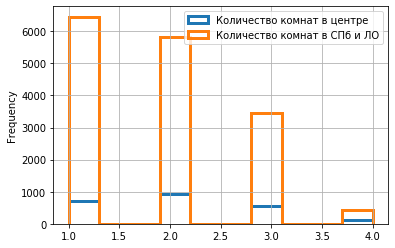

In [87]:
center_data['rooms'].plot(kind = 'hist', bins = 10, histtype = 'step', linewidth = 3,label = 'Количество комнат в центре', grid = True, legend = True)
#plt.title('Количество комнат в центре')
#plt.show()
good_data['rooms'].plot(kind = 'hist', bins = 10, histtype = 'step', linewidth = 3,label = 'Количество комнат в СПб и ЛО', grid = True, legend = True)
#plt.title('Количество комнат в СПб и ЛО')
#plt.show()

#В центре покпали меньше однокомнатных квартир

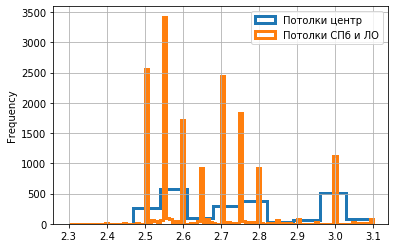

In [84]:
center_data['ceiling_height'].plot(kind = 'hist', bins = 10, histtype = 'step', linewidth = 3,label = 'Потолки центр', grid = True, legend = True)
#plt.title('Потолки центр')
#plt.show()
good_data['ceiling_height'].plot(kind = 'hist', bins = 100, histtype = 'step', linewidth = 3,label = 'Потолки СПб и ЛО', grid = True, legend = True)
#plt.title('Потолки СПб и ЛО')0
#plt.show()
#Потолки в центре выше и это логично - большое количество зданий старой планировки (дореволюционные в том числе)

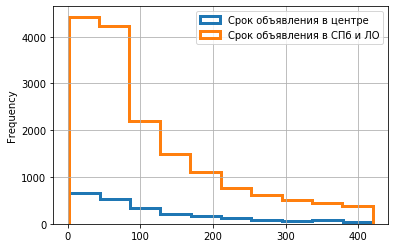

In [114]:
center_data['days_exposition'].plot(kind = 'hist', bins = 10, histtype = 'step', linewidth = 3,label = 'Срок объявления в центре', grid = True, legend = True)
#plt.title('Срок объявления в центре')
#plt.show()
good_data['days_exposition'].plot(kind = 'hist', bins = 10, histtype = 'step', linewidth = 3,label = 'Срок объявления в СПб и ЛО', grid = True, legend = True)
#plt.title('Срок объявления в СПб и ЛО')
#plt.show()
#Данные схожи

In [66]:
center_data['rooms'].corr(center_data['price_million']) # 0.4704549668680672
#Ествественно есть взаимосвязь между количсетвом комнат и ценой. Она почти такая же, как и в случае с обычными квартирами (good_data: 0.40803097082857237)
center_data['total_area'].corr(center_data['price_million']) #0.7466685191096258
#Общая площадь влияетна цену гораздо больше количесвта комнат

0.7466685191096258

In [58]:
center_data['floor'].corr(center_data['price_million']) # 0.10295184168168113
#Этаж тоже вляет на цену, на не так сильно как количество комнат. В центре эта связь даже меньше, чем в целом по СПб и ЛО (0.1781468632825332).

0.10295184168168113

In [59]:
center_data['cityCenters_nearest'].corr(center_data['price_million']) # -0.3214498227353362
#Прямой связи нет, как и в случае СПб и ЛО в целом

-0.3214498227353362

In [63]:
center_data['month'].corr(center_data['price_million']) # 0.022427087719513322 
#Небольшая связь цены с  меяцем размещения объявления есть. Даже в большей степени, чем по СПб и ЛО (0.0026706912401585027)
center_data['year'].corr(center_data['price_million']) # 0.022338276668483485
#Год размещения объявления связан с ценой в меньшей стпени, нежели месяц. В СПб и ЛО иная ситуация (0.0345840862878397). Очевидно, рынок недвижимости в центре менне восприимчив к колебаниям рынка в целом
center_data['weekday'].corr(center_data['price_million']) # 0.015647522183493186
#Довольно неожиданный результат: есть связь между днем недели размещения объявления и ценой. Связь слабая, но есть. СПб и ЛО прямой связи не имеют (-0.009995912611514333)
#Возможно тут дело в том, что сам по себе рынок недвижимости в центре уже, он готов откликаться гораздо быстрее на каждое новое объявление о продаже недвижимости

0.015647522183493186

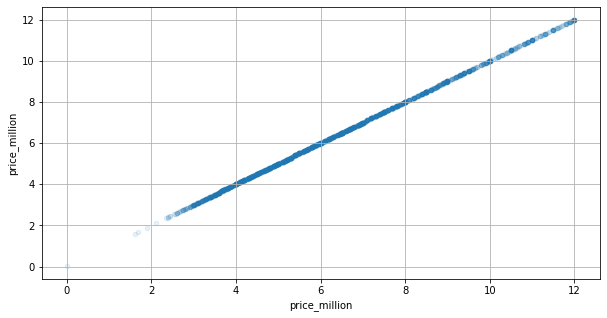

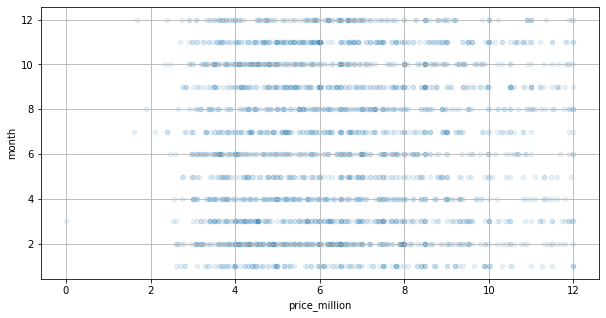

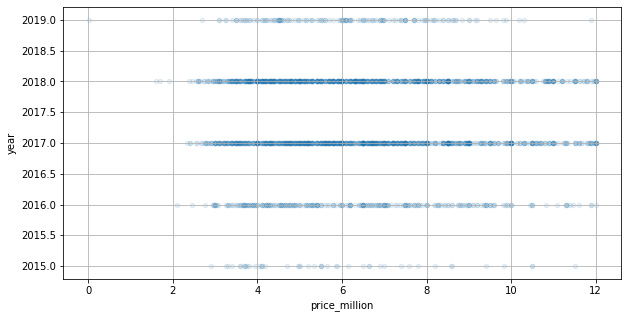

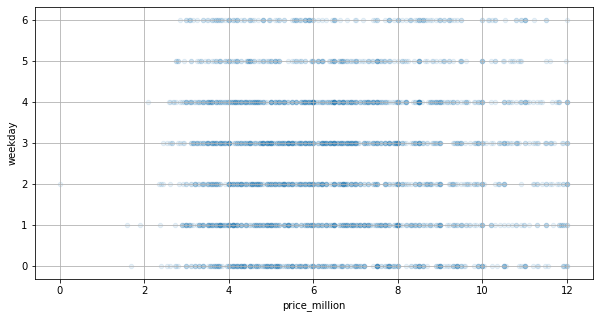

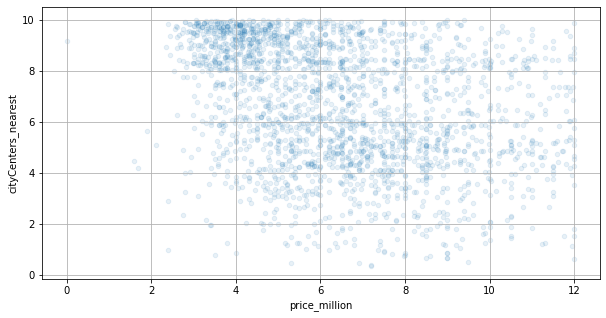

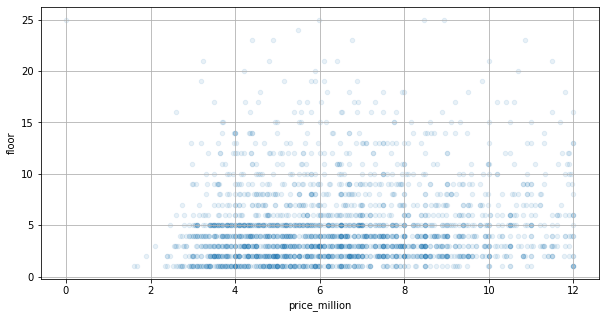

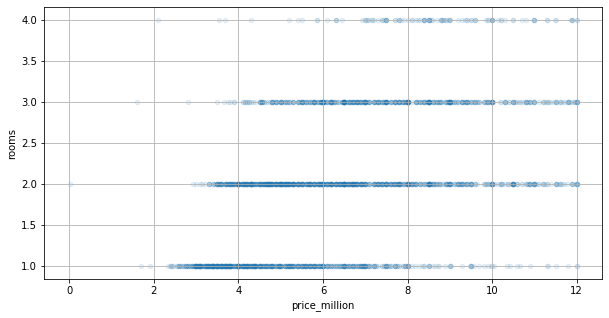

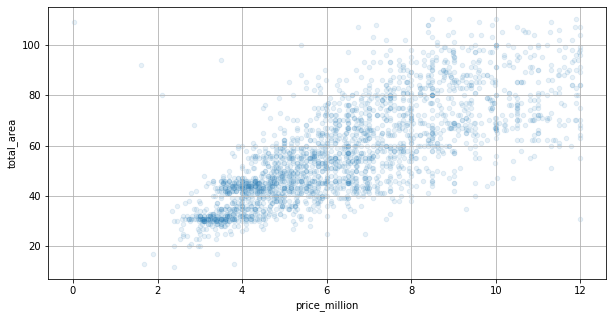

In [113]:
#Графики различия
centers = center_data[['price_million','month', 'year', 'weekday',  'cityCenters_nearest', 'floor', 'rooms', 'total_area']]
for row in centers:
    centers.plot(kind = 'scatter', x = 'price_million', y = row, grid = True, alpha = 0.1, figsize = (10, 5))
plt.show()

5) Общий вывод

Очевидно, что населенные пункты, нахоядщиеся в пределах Санкт-Петербурга имеют более дорогую недвижимость, нежели другие субъекты Ленинградской области. Как пример, это стоимость м2 в Выборге относительно субъектов расположенных в пределах СПб. Помимо расположения квартир, на цену так же влияет и кличесвто комнат, но не так сильно как общая площадь недвижимости. Из интересного можно отметить, что год размещения по объективным экономическим причинам напрямую влияет на цену недвижимости, но рынок недвижимсоти в центре менее подвержен этим колебаниям. Удивительно, но этаж квартиры не так сильно повлиял на стоимость квартир - метраж и количсетво комнат для клиентов гораздо важнее. Также любопытно отсутсвие прямой корреляции между близостью к центру и ценой. В случае с данными по центральному рынку недвижимости это объяснимо - итак в центре, важны уже другие факторы (метраж, например).
По высоте потолков все просто - старая застройка в центре СПб имеет высокие потолки, просто потому, что так раньше было принято строить здания. 